Imports


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from kloppy import wyscout, statsbomb
from kloppy.domain import Orientation
import kloppy
import pandas as pd
import warnings
from graph import build_transition_graph, visualise_transition_graph, ZoneTransformer

Gathering Match Data

In [2]:
zt = ZoneTransformer()

match_id = 2499843
match_data = wyscout.load_open_data(match_id)
match_data = match_data.transform(Orientation.ACTION_EXECUTING_TEAM)

home_team, away_team = match_data.metadata.teams
home_id, away_id = int(home_team.team_id), int(away_team.team_id)

match_df = match_data.to_df(*zt.INCLUDE_COLS, engine='pandas')
match_df.set_index('event_id', inplace=True)
match_df = zt.transform(match_df)

home_df = match_df[match_df['team_id'] == home_id]
away_df = match_df[match_df['team_id'] == away_id]

G_home = build_transition_graph(home_df)
G_away = build_transition_graph(away_df)

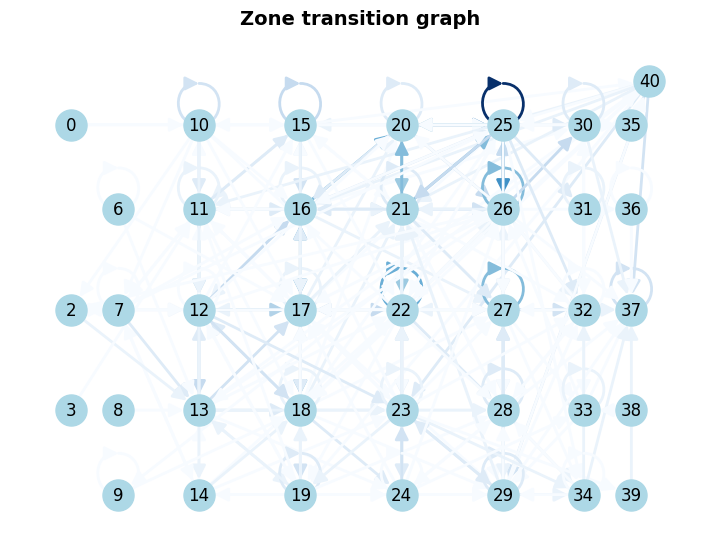

In [3]:
visualise_transition_graph(G_home)

Visualize the Louvaine communities

In [4]:
def visualize_louvaine(G):
    community_dict = {}
    communities = nx.community.louvain_communities(G, weight='weight')
    for comm_id, comm in enumerate(communities):
        for node in comm:
            community_dict[node] = comm_id

    pos = {zone_id: zt.get_zone_center(zone_id) for zone_id in G.nodes()}
    weights = [G[u][v]["weight"] for u, v in G.edges()]

    num_comm = len(communities)
    cmap = cm.get_cmap('tab10', num_comm)
    node_colors = [community_dict[node] for node in G.nodes()]
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=500,
        node_color=node_colors,
        arrowsize=20,
        edge_color=weights,
        cmap=cmap,
        edge_cmap=plt.cm.Blues,
        width=2,
    )

    plt.title("Graph with Louvain communities")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Example use
visualize_louvaine(G_away)

TypeError: unhashable type: 'set'